<a href="https://colab.research.google.com/github/dinukaDB/number_classification/blob/main/dbnfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import tensorflow as tf
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Preprocessing data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0  # Flatten and normalize
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0


In [ ]:
# Split training data for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [ ]:
# Define RBM layers
rbm1 = BernoulliRBM(n_components=256, learning_rate=0.01, n_iter=10, random_state=42)
rbm2 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=10, random_state=42)

In [ ]:
# Stack RBMs to form a DBN pipeline
dbn = Pipeline(steps=[
    ('rbm1', rbm1),
    ('rbm2', rbm2),
])

In [ ]:
# Fit the DBN
print("Training RBMs...")
dbn.fit(x_train)

Training RBMs...


Pipeline(steps=[('rbm1', BernoulliRBM(learning_rate=0.01, random_state=42)),
                ('rbm2',
                 BernoulliRBM(learning_rate=0.01, n_components=128,
                              random_state=42))])

Displaying features learned by RBM 1...


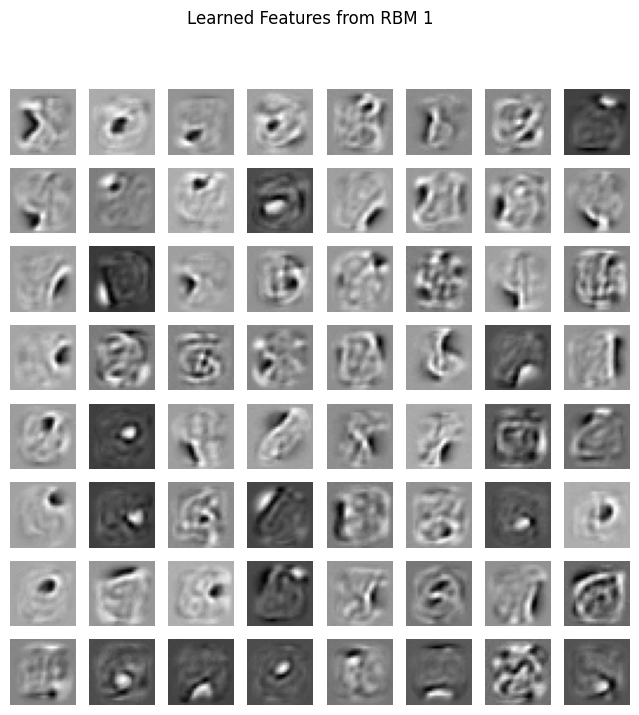

In [ ]:
# Display a sample of features learned by the first RBM
print("Displaying features learned by RBM 1...")
weights = rbm1.components_
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    if i < weights.shape[0]:
        ax.imshow(weights[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
plt.suptitle("Learned Features from RBM 1")
plt.show()

In [ ]:
# Transform features with DBN
print("Transforming data with DBN...")
x_train_transformed = dbn.transform(x_train)
x_val_transformed = dbn.transform(x_val)
x_test_transformed = dbn.transform(x_test)


Transforming data with DBN...


In [ ]:
# Display some transformed features
print("Transformed features from DBN (sample):")
print(x_train_transformed[:5])  # Display the first 5 transformed samples

Transformed features from DBN (sample):
[[9.99399234e-01 2.92656078e-02 2.46912577e-03 9.99983186e-01
  4.98153048e-03 5.11825584e-02 8.85683906e-01 1.01325519e-03
  9.94447767e-01 1.31083135e-04 4.18670290e-05 8.45377885e-01
  9.99382021e-01 6.22971410e-06 9.99946372e-01 5.65570511e-02
  9.42346719e-05 9.14456372e-04 1.12460084e-03 4.85288029e-04
  2.17941260e-04 1.55265327e-04 5.91924118e-04 3.90344876e-04
  4.19886119e-01 6.42078377e-04 8.71606120e-01 9.91232179e-01
  7.25723967e-01 3.26509112e-03 2.09290242e-04 9.99772565e-01
  1.53804061e-01 9.99291936e-01 3.73476650e-04 2.80543078e-01
  7.33523712e-05 2.37313307e-02 9.99528535e-01 2.86527529e-02
  3.34700779e-02 1.38443269e-04 7.86610289e-01 3.28594324e-03
  8.73942182e-01 6.55042222e-01 1.02844146e-03 9.31965875e-01
  1.85223235e-02 2.11558759e-01 9.80327987e-01 8.19401187e-06
  4.49159263e-04 8.96230200e-04 9.39786793e-01 6.56489035e-01
  7.52910272e-06 9.78802197e-01 7.23476412e-01 9.99780352e-01
  4.54520997e-01 9.97795011e-0

In [ ]:
# Build a simple classifier on top of DBN features
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
print("Training the classifier...")
history = model.fit(x_train_transformed, y_train, validation_data=(x_val_transformed, y_val), epochs=10, batch_size=64)

Training the classifier...
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7973 - loss: 0.7571 - val_accuracy: 0.9406 - val_loss: 0.2090
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9406 - loss: 0.1997 - val_accuracy: 0.9497 - val_loss: 0.1745
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9489 - loss: 0.1688 - val_accuracy: 0.9532 - val_loss: 0.1551
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9554 - loss: 0.1485 - val_accuracy: 0.9572 - val_loss: 0.1422
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9568 - loss: 0.1391 - val_accuracy: 0.9609 - val_loss: 0.1285
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9605 - loss: 0.1296 - val_accuracy: 0.9610 - val_loss: 0.1231
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9639 - loss: 0.1154 - val_accuracy: 0.9637 - val_loss: 0.1194
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9664 - loss

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_transformed, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9579 - loss: 0.1302
Test Accuracy: 96.40%


Displaying predictions for test samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


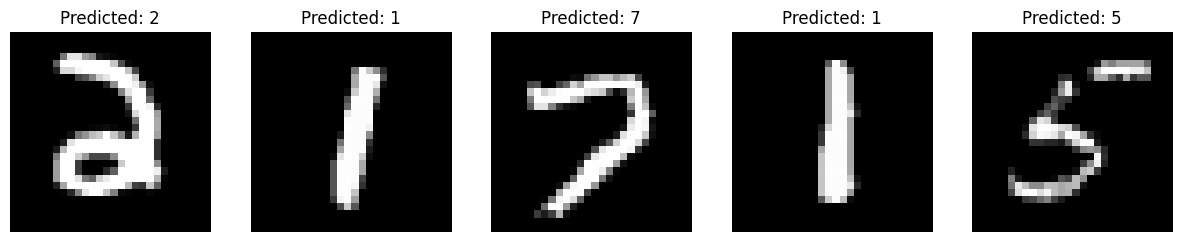

In [ ]:
# Display predictions for a few test samples
print("Displaying predictions for test samples...")
sample_indices = np.random.choice(len(x_test_transformed), 5, replace=False)
sample_images = x_test[sample_indices].reshape(-1, 28, 28)
sample_transformed = x_test_transformed[sample_indices]
sample_predictions = np.argmax(model.predict(sample_transformed), axis=1)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i], cmap='gray')
    ax.set_title(f"Predicted: {sample_predictions[i]}")
    ax.axis('off')
plt.show()